**IMPORTING  REQUIRED LIBRARIES**

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

**READING THE TRAIN DATA FILES**

In [ ]:
# Read the train data files
cust_data = pd.read_excel('/content/Customerdata_Train.xlsx')
cust_data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


In [ ]:
email_data = pd.read_excel('/content/Emaildata_Train.xlsx')
email_data.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [ ]:
train_data = pd.read_excel('/content/Train.xlsx')
train_data.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [ ]:
trans_data = pd.read_excel('/content/transactionsdata_Train.xlsx')
trans_data.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


**DIMENSIONS OF THE DATA**

In [ ]:
# Gives the number of records and columns in the dataframe
print('cust_data shape',cust_data.shape)
print('email_data shape',email_data.shape)
print('train_data shape',train_data.shape)
print('trans_data shape',trans_data.shape)

cust_data shape (23820, 7)
email_data shape (517672, 6)
train_data shape (23820, 2)
trans_data shape (104755, 4)


**IDENTIFICATION OF VARIABLES AND DATATYPES**

In [ ]:
# Checking the cust_data datatypes
cust_data.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
dtype: object

In [ ]:
# Checking the email_data datatypes
email_data.dtypes

CustomerID     object
DateOfemail    object
EmailType      object
timestamp      object
MailOpened     object
MailClicked    object
dtype: object

In [ ]:
# Checking the train_data dtypes
train_data.dtypes

CustomerID            object
RetentionPotential    object
dtype: object

In [ ]:
# Checking the trans_data dtypes
trans_data.dtypes

CustomerID       object
DateOfOrder      object
timestamp        object
OrderQuantity     int64
dtype: object

**UNIQUE VALUE COUNT ANALYSIS**

In [ ]:
# cust_data unique value count analysis
cust_data.nunique()

CustomerID              23820
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [ ]:
# email_data unique value count analysis
email_data.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
timestamp      14369
MailOpened         2
MailClicked        3
dtype: int64

In [ ]:
# train_data unique value count analysis
train_data.nunique()

CustomerID            23820
RetentionPotential        3
dtype: int64

In [ ]:
# trans_data unique value count analysis
trans_data.nunique()

CustomerID       23820
DateOfOrder       3151
timestamp        21399
OrderQuantity      451
dtype: int64

**EXPLORATORY DATA ANALYSIS**






**Misssing Values In Each Dataset**

In [ ]:
# Check for null values in each column
cust_data.isna().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [ ]:
# Check for null values in each column
email_data.isna().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

In [ ]:
# Check for null values in each column
train_data.isna().sum()

CustomerID            0
RetentionPotential    0
dtype: int64

In [ ]:
# Check for null values in each column
trans_data.isna().sum()

CustomerID       0
DateOfOrder      0
timestamp        0
OrderQuantity    0
dtype: int64

In [ ]:
# Counts frequency of values in 'EmailType' column of 'email_data'
email_data.EmailType.value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [ ]:
# Counts frequency of values in 'MailOpened' column of 'email_data'
email_data.MailOpened.value_counts()

no     369812
yes    147860
Name: MailOpened, dtype: int64

In [ ]:
# Counts frequency of values in 'MailClicked' column of 'email_data'
email_data.MailClicked.value_counts()

no               466011
yes               27841
NotApplicable     23820
Name: MailClicked, dtype: int64

In [ ]:
# Convert date of email to a datetime datatype
email_data["DateOfemail"]=pd.to_datetime(email_data["DateOfemail"])

In [ ]:
# Checking the email_data datatypes
email_data.dtypes

CustomerID             object
DateOfemail    datetime64[ns]
EmailType              object
timestamp              object
MailOpened             object
MailClicked            object
dtype: object

In [ ]:
# Calculates frequency of CustomerID, EmailType, MailOpened, and MailClicked for each customer in a DataFrame, and merges the frequency tables on the CustomerID column.
def manp_data(df2):
    df2_email=pd.crosstab(df2.CustomerID,df2.EmailType).reset_index()
    df2_mail=pd.crosstab(df2.CustomerID,df2.MailOpened).reset_index()
    df2_click=pd.crosstab(df2.CustomerID,df2.MailClicked).reset_index()
    df2=df2_email.merge(df2_mail,on="CustomerID",how="left").merge(df2_click,on="CustomerID",how="left")
    return df2
df2=manp_data(email_data)

In [ ]:
# Load the cust_data
cust_data 

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday
...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday
23816,C12197,CITY3,2018-01-17,1,0,1,Friday
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday


In [ ]:
# Group 'trans_data' by 'CustomerID' and calculate sum and count of 'OrderQuantity'
df4_re=trans_data.groupby(["CustomerID"]).agg({'OrderQuantity': ["sum","count"]}).reset_index()

# Flatten multi-level column index to single level using underscores
df4_re.columns = ['_'.join(col) for col in df4_re.columns.values]

In [ ]:
# Rename the 'CustomerID_' column to 'CustomerID'
df4_re.rename(columns={"CustomerID_":"CustomerID"},inplace=True)

In [ ]:
# Load the customer data from a xlsx file into a DataFrame
cust_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday
...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday
23816,C12197,CITY3,2018-01-17,1,0,1,Friday
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday


In [ ]:
# load the transactions_data
df4_re

,CustomerID,OrderQuantity_sum,OrderQuantity_count
0,C12116,115,3
1,C12117,41,1
2,C12118,41,1
3,C12119,52,1
4,C12120,31,1
...,...,...,...
23815,C42185,1340,13
23816,C42186,46,1
23817,C42187,41,1
23818,C42188,51,1


**FINAL MERGING**

In [ ]:
# Merges four DataFrames on 'CustomerID' column using a left join for each merge.
final_merge=train_data.merge(df2,on="CustomerID",how="left").merge(cust_data,on="CustomerID",how="left").merge(df4_re,
                                                                                               on="CustomerID",how="left")

In [ ]:
# load the final_merge data
final_merge 

,CustomerID,RetentionPotential,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity_sum,OrderQuantity_count
0,C37869,Low,47,1,44,4,1,47,0,CITY4,2011-07-27,0,0,0,Thursday,982,8
1,C33841,Low,10,1,4,7,1,8,2,CITY1,2013-11-19,1,0,1,Thursday,43,1
2,C29464,Low,0,1,0,1,1,0,0,CITY2,2010-05-24,0,0,0,Tuesday,51,1
3,C28158,Low,0,1,0,1,1,0,0,CITY1,2017-06-19,1,0,0,Saturday,60,1
4,C22785,High,0,1,0,1,1,0,0,CITY2,2013-12-13,1,0,0,Thursday,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C14975,Low,47,1,47,1,1,47,0,CITY4,2012-03-28,0,0,0,Tuesday,57,5
23816,C30392,Low,46,1,40,7,1,46,0,CITY2,2011-01-26,0,0,0,Monday,662,12
23817,C41735,Low,37,1,18,20,1,32,5,CITY3,2013-09-21,1,0,0,Wednesday,29,1
23818,C26055,Low,26,1,20,7,1,23,3,CITY4,2013-11-23,1,0,0,Friday,55,1


In [ ]:
# Checking the snapshot of the final_merge dataset
final_merge.head()

,CustomerID,RetentionPotential,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity_sum,OrderQuantity_count
0,C37869,Low,47,1,44,4,1,47,0,CITY4,2011-07-27,0,0,0,Thursday,982,8
1,C33841,Low,10,1,4,7,1,8,2,CITY1,2013-11-19,1,0,1,Thursday,43,1
2,C29464,Low,0,1,0,1,1,0,0,CITY2,2010-05-24,0,0,0,Tuesday,51,1
3,C28158,Low,0,1,0,1,1,0,0,CITY1,2017-06-19,1,0,0,Saturday,60,1
4,C22785,High,0,1,0,1,1,0,0,CITY2,2013-12-13,1,0,0,Thursday,41,1


In [ ]:
# Checking the shape of the final_merge dataset
final_merge.shape

(23820, 17)

In [ ]:
# To understand the datatype for each of the variables
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            23820 non-null  object        
 1   RetentionPotential    23820 non-null  object        
 2   CustomizedEmail       23820 non-null  int64         
 3   WelcomeEmail          23820 non-null  int64         
 4   no_x                  23820 non-null  int64         
 5   yes_x                 23820 non-null  int64         
 6   NotApplicable         23820 non-null  int64         
 7   no_y                  23820 non-null  int64         
 8   yes_y                 23820 non-null  int64         
 9   City                  23820 non-null  object        
 10  DateOfRegistration    23820 non-null  datetime64[ns]
 11  OnlineCommunication   23820 non-null  int64         
 12  AutomaticRefill       23820 non-null  int64         
 13  DoorstepDelivery

In [ ]:
# Checking the null values in final_merge dataset
final_merge.isna().sum()

CustomerID              0
RetentionPotential      0
CustomizedEmail         0
WelcomeEmail            0
no_x                    0
yes_x                   0
NotApplicable           0
no_y                    0
yes_y                   0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
OrderQuantity_sum       0
OrderQuantity_count     0
dtype: int64

In [ ]:
# Checking unique value count analysis in final_merge dataset
final_merge.nunique()

CustomerID              23820
RetentionPotential          3
CustomizedEmail            84
WelcomeEmail                1
no_x                       70
yes_x                      61
NotApplicable               1
no_y                       80
yes_y                      30
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
OrderQuantity_sum        2206
OrderQuantity_count       150
dtype: int64

In [ ]:
# Checking the datatypes in final_merge dataset
final_merge.dtypes

CustomerID                      object
RetentionPotential              object
CustomizedEmail                  int64
WelcomeEmail                     int64
no_x                             int64
yes_x                            int64
NotApplicable                    int64
no_y                             int64
yes_y                            int64
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
OrderQuantity_sum                int64
OrderQuantity_count              int64
dtype: object

In [ ]:
# Checking the descriptive statistics of final_merge dataset
final_merge.describe()

,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity_sum,OrderQuantity_count
count,23820.000000,23820.0,23820.000000,23820.000000,23820.0,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000
mean,20.732662,1.0,15.525273,6.207389,1.0,19.563854,1.168808,0.660411,0.094710,0.037615,357.622922,4.397775
std,20.040546,0.0,17.239732,8.517405,0.0,19.168208,2.376062,0.473580,0.292821,0.190268,1335.649680,12.142475
min,0.000000,1.0,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.0,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,1.000000
50%,19.000000,1.0,7.000000,2.000000,1.0,17.000000,0.000000,1.000000,0.000000,0.000000,65.000000,1.000000
75%,40.000000,1.0,32.000000,8.000000,1.0,38.000000,1.000000,1.000000,0.000000,0.000000,169.000000,3.000000
max,291.000000,1.0,91.000000,256.000000,1.0,249.000000,42.000000,1.000000,1.000000,1.000000,51429.000000,257.000000


**EXPLORATORY DATA ANALYSIS**

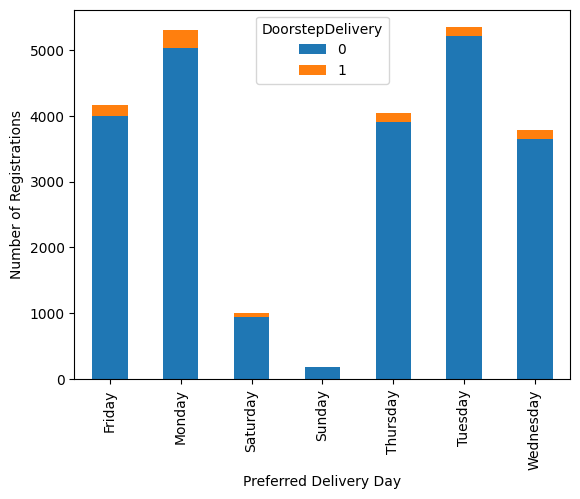

---- INSIGHTS----
The graph shows the distribution of registrations by Preferred Delivery Day and Doorstep Delivery. Each bar represents the total number of registrations for a particular Preferred Delivery Day, and the stacked segments within each bar show how many registrations selected Doorstep Delivery (in orange) and how many did not (in blue)


In [ ]:
# Group the final merged DataFrame by 'PreferredDeliveryDay' and 'DoorstepDelivery', and calculate the size of each group
delivery_by_day = final_merge.groupby(['PreferredDeliveryDay', 'DoorstepDelivery']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
delivery_by_day.plot(kind='bar', stacked=True)

# Set the x-axis label to 'Preferred Delivery Day'
plt.xlabel('Preferred Delivery Day')

# Set the y-axis label to 'Number of Registrations'
plt.ylabel('Number of Registrations')

# Display the plot
plt.show()

print('---- INSIGHTS----')
print('The graph shows the distribution of registrations by Preferred Delivery Day and Doorstep Delivery. Each bar represents the total number of registrations for a particular Preferred Delivery Day, and the stacked segments within each bar show how many registrations selected Doorstep Delivery (in orange) and how many did not (in blue)')

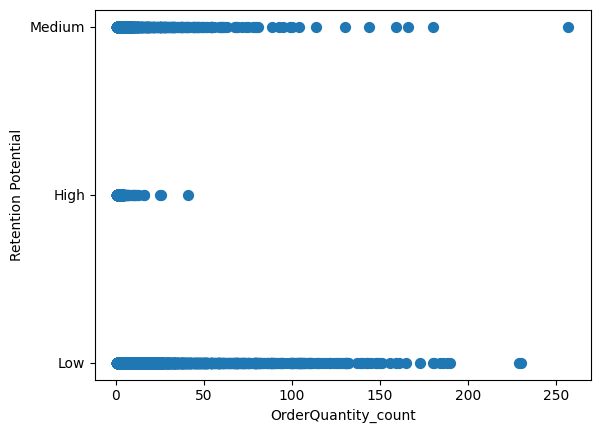

---- INSIGHTS----
 Each point on the plot represents a customer, and the x-coordinate of the point represents the total number of orders placed by the customer, while the y-coordinate represents the customers likelihood of remaining loyal to the company.


In [ ]:
# Create a scatter plot of 'OrderQuantity_count' versus 'RetentionPotential'
plt.scatter(final_merge['OrderQuantity_count'], final_merge['RetentionPotential'], s=50)

# Set the x-axis and y-axis labels
plt.xlabel('OrderQuantity_count')
plt.ylabel('Retention Potential')

# Display the plot
plt.show()


print('---- INSIGHTS----')
print(' Each point on the plot represents a customer, and the x-coordinate of the point represents the total number of orders placed by the customer, while the y-coordinate represents the customers likelihood of remaining loyal to the company.')

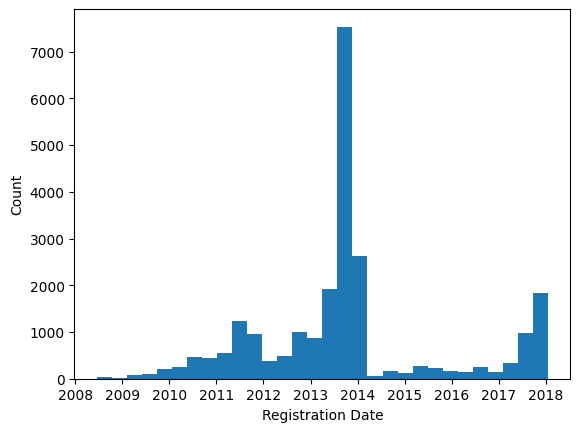

---- INSIGHTS----
The height of each bar represents the number of registrations that occurred during that time interval.


In [ ]:
# Create a histogram of 'DateOfRegistration' column
plt.hist(final_merge['DateOfRegistration'], bins=30)

# Set the x-axis and y-axis labels
plt.xlabel('Registration Date')
plt.ylabel('Count')

# Display the plot
plt.show()

print('---- INSIGHTS----')
print('The height of each bar represents the number of registrations that occurred during that time interval.')

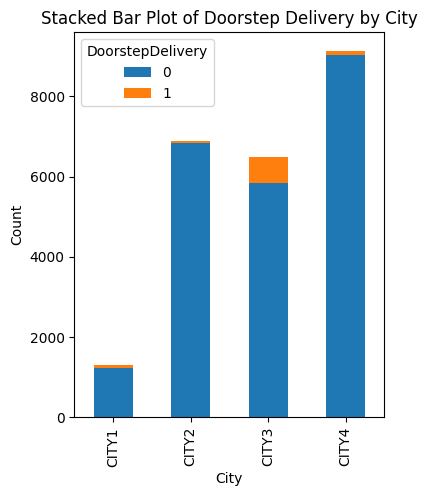

---- INSIGHTS----
The resulting plot shows the counts of customers who opted for doorstep delivery and those who did not, for each city.


In [ ]:
# Group the data by 'City' and 'DoorstepDelivery', and create a stacked bar plot
city_delivery = final_merge.groupby(['City', 'DoorstepDelivery']).size().unstack(fill_value=0)
city_delivery.plot(kind='bar', stacked=True, figsize=(4, 5))

# Set the plot title and x-axis, y-axis labels
plt.title('Stacked Bar Plot of Doorstep Delivery by City')
plt.xlabel('City')
plt.ylabel('Count')

# Show the plot
plt.show()

print('---- INSIGHTS----')
print('The resulting plot shows the counts of customers who opted for doorstep delivery and those who did not, for each city.')

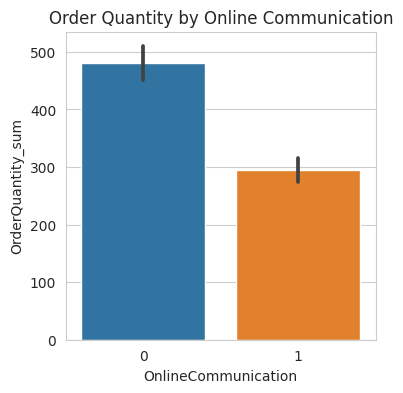

---- INSIGHTS----
The resulting plot shows the counts of customers who opted for doorstep delivery and those who did not, for each city.


In [ ]:
# Set seaborn style to whitegrid
sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))

# Create a bar plot of 'OrderQuantity_sum' vs 'OnlineCommunication'
sns.barplot(x='OnlineCommunication', y='OrderQuantity_sum', data=final_merge)
plt.title('Order Quantity by Online Communication')
plt.show()

print('---- INSIGHTS----')
print('The resulting plot shows the counts of customers who opted for doorstep delivery and those who did not, for each city.')

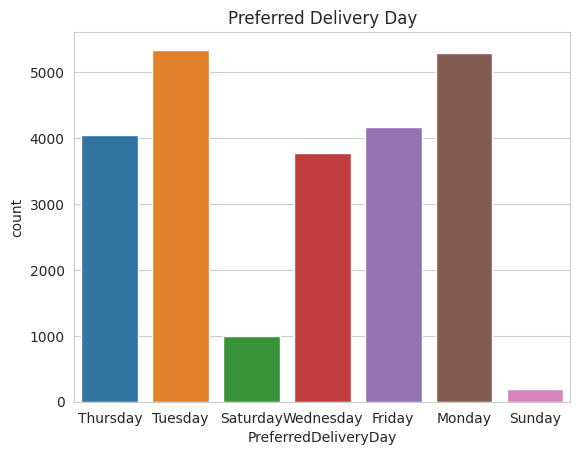

---- INSIGHTS----
The number of customers who selected each day of the week as their preferred delivery day. From the plot, you can see that the majority of customers preferred their deliveries to be made on Monday and Tuesday.


In [ ]:
# Plots a countplot of the 'PreferredDeliveryDay' column from the 'final_merge' dataframe
sns.countplot(x='PreferredDeliveryDay', data=final_merge)

# Sets the title of the plot to 'Preferred Delivery Day'
plt.title('Preferred Delivery Day')

# Display the plot
plt.show()

print('---- INSIGHTS----')
print('The number of customers who selected each day of the week as their preferred delivery day. From the plot, you can see that the majority of customers preferred their deliveries to be made on Monday and Tuesday.')

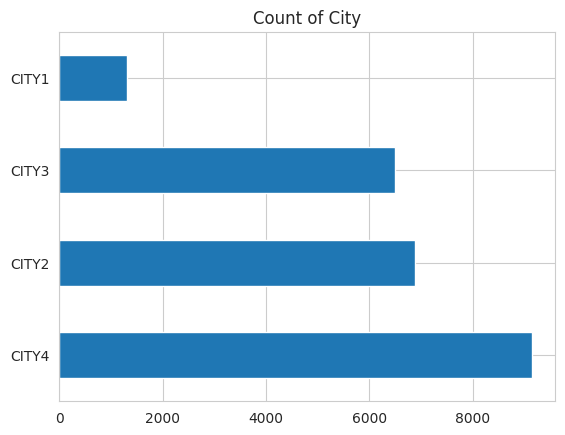

---- INSIGHTS----
So, this horizontal bar plot shows the number of customers from each city. The longer the bar for a city, the more customers are from that city.


In [ ]:
# create a horizontal bar plot of the "City" column
final_merge['City'].value_counts().plot(kind='barh')

# Sets the title of the plot to 'Count of City'
plt.title('Count of City')

# Display the plot
plt.show()

print('---- INSIGHTS----')
print('So, this horizontal bar plot shows the number of customers from each city. The longer the bar for a city, the more customers are from that city.')

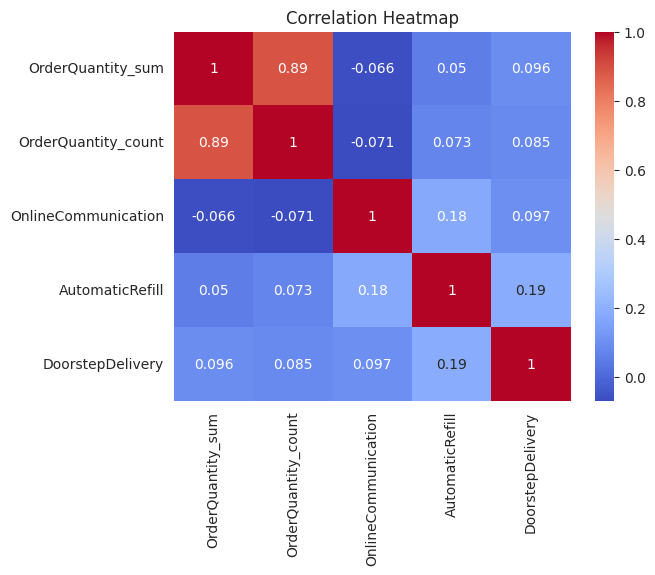

---- INSIGHTS----
In the heatmap, the color scale is used to represent the correlation values. Darker colors represent stronger positive correlations, while lighter colors represent weaker correlations or negative correlations


In [ ]:
# Select the columns of interest
cols_of_interest = ['OrderQuantity_sum', 'OrderQuantity_count', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery']

# Create a subset of the dataframe with only the selected columns
subset = final_merge[cols_of_interest]

# Calculate the correlation matrix
corr_matrix = subset.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


print('---- INSIGHTS----')
print('In the heatmap, the color scale is used to represent the correlation values. Darker colors represent stronger positive correlations, while lighter colors represent weaker correlations or negative correlations')


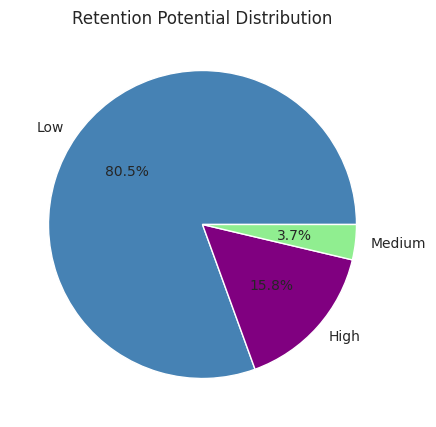

In [ ]:
# Calculate the counts for each category in the 'RetentionPotential' column
counts = final_merge['RetentionPotential'].value_counts()

# Create a pie chart with the counts
plt.figure(figsize=(5,5))
plt.colors=['steelblue','purple','lightgreen']
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors = plt.colors)
plt.title('Retention Potential Distribution')
plt.show()
